<h1 style="font-size:42px; text-align:center;">2. Data Cleaning</h1>
<hr>

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
df = pd.read_csv('project_files/real_estate_data.csv')

In [4]:
# Drop duplicates (if we have any of them)
df = df.drop_duplicates()
df.shape

(1883, 26)

# Fixing structural errors

In [5]:
bsmt = df.basement.unique()
bsmt

array([nan,  1.])

In [6]:
# Basement being a numerical feature has missing values.
# NaN w.r.t Basement feature can be assumed as 'the house has no basement' and hance we can replace NaN with 0.

df['basement'] = df.basement.fillna(0)

Confirm that we have a true indicator variable:

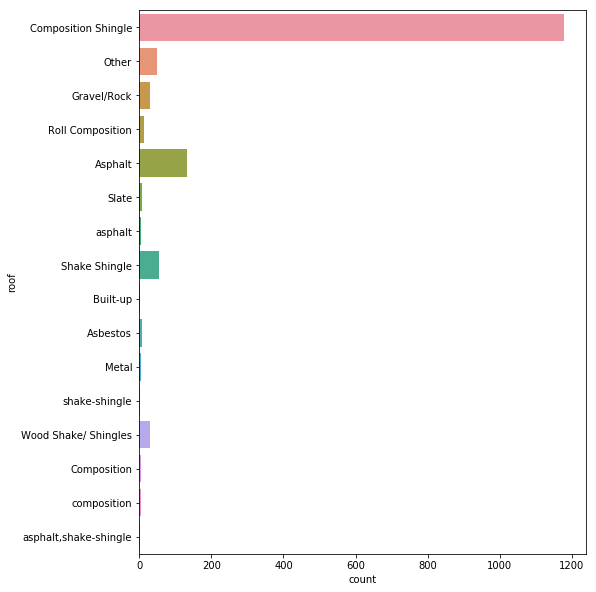

In [8]:
plt.figure(figsize=(8,10))
sns.countplot(y='roof', data=df)
plt.show()

Typing style difference and handling similar categories:
* <code style="color:steelblue">'composition'</code> can be replaced by <code style="color:steelblue">'Composition'</code>
* <code style="color:steelblue">'asphalt'</code> can be replaced by <code style="color:steelblue">'Asphalt'</code>
* <code style="color:steelblue">'shake-shingle'</code> can be replaced by <code style="color:steelblue">'Shake Shingle'</code>
* <code style="color:steelblue">'asphalt,shake-shingle'</code> can be replaced with <code style="color:steelblue">'Shake Shingle'</code> as it has very less number of observations hence we can consider to put it inside Shake Shingles.

In [9]:
df.roof.replace('composition', 'Composition', inplace=True)
df.replace('asphalt', 'Asphalt', inplace=True)
df.replace(['shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle', inplace=True)

Checking for mislabeled classes in distributions of <code style="color:steelblue">'exterior_walls'</code>.

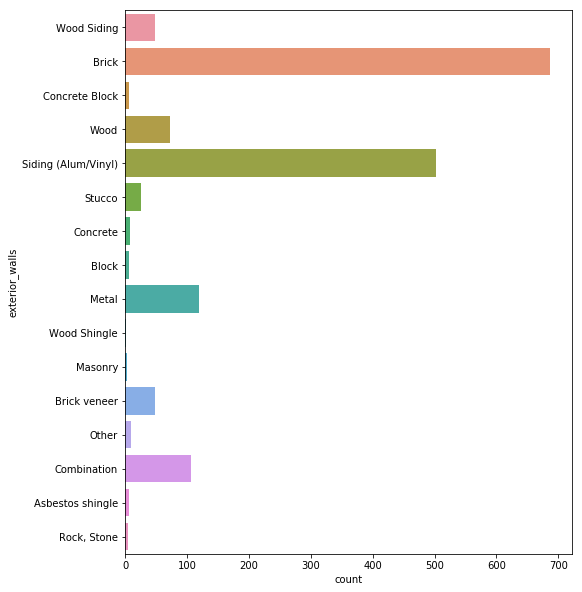

In [10]:
plt.figure(figsize=(8,10))
sns.countplot(y='exterior_walls', data=df)
plt.show()

Possible fixes:
* <code style="color:steelblue">'Rock, Stone'</code> &rarr; <code style="color:steelblue">'Masonry'</code>
* <code style="color:steelblue">'Concrete'</code> and <code style="color:steelblue">'Block'</code> &rarr; <code style="color:steelblue">'Concrete Block'</code>

In [11]:
df.exterior_walls.replace('Rock, Stone', 'Masonry', inplace=True)

In [12]:
df.exterior_walls.replace(['Concrete', 'Block'], 'Concrete Block', inplace=True)

**New distribution of <code style="color:steelblue">exterior_walls</code>.**

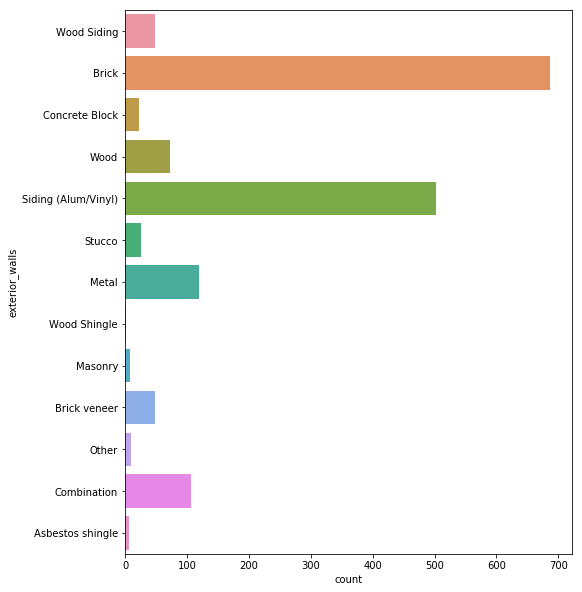

In [13]:
plt.figure(figsize=(8,10))
sns.countplot(y='exterior_walls', data=df)
plt.show()

# Remove unwanted outliers

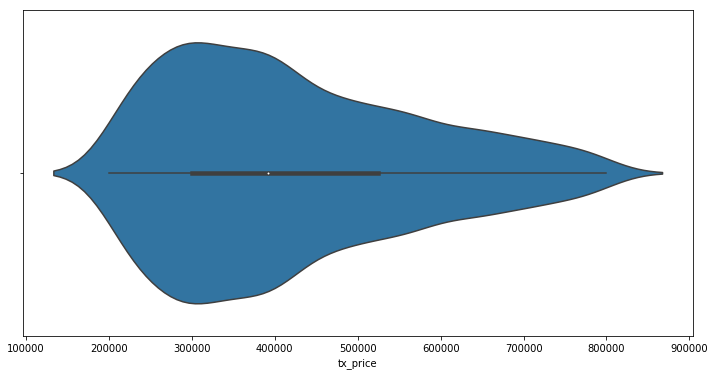

In [15]:
plt.figure(figsize=(12,6))
sns.violinplot(x='tx_price', data=df)
plt.show()

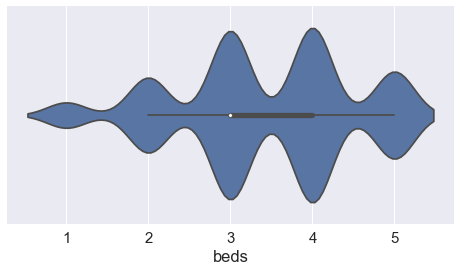

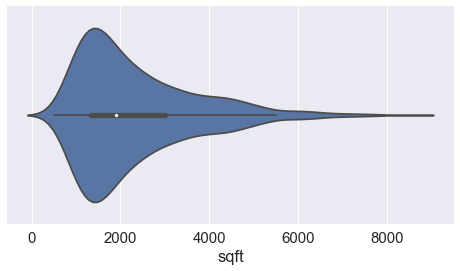

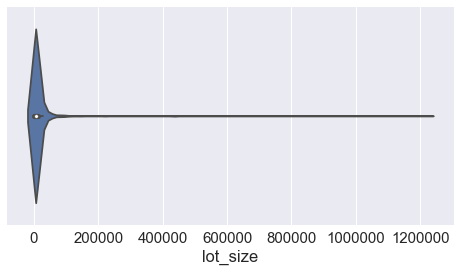

In [16]:
sns.set(font_scale=1.5)

plt.figure(figsize=(8,4))
sns.violinplot(x='beds', data=df)
plt.show()

plt.figure(figsize=(8,4))
sns.violinplot(x='sqft', data=df)
plt.show()

plt.figure(figsize=(8,4))
sns.violinplot(x='lot_size', data=df)
plt.show()

### Conclusion:
* From the plots, we can conclude that <b><code style="color:steelblue">lot_size</code> has a potential outlier as it has long and skinny tail.</b>

In [17]:
df.lot_size.sort_values(ascending=False).head()

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

### Conclusion:
* The largest property has a lot_size of 1,220,551 sqft. 
* The next largest has a lot_size of only 436,471 sqft.

These two values have a very large difference, it is very less likely that a person would buy a home with such a large <code style="color:steelblue">lot_size</code>

Hence, we would remove it.

In [18]:
df = df[df.lot_size <= 500000]
print(len(df))

1882


# Labeling missing categorical data

In [19]:
df.select_dtypes(include='object').isnull().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

**A loop to fill the missing categorical values as <code style="color:steelblue">'Missing'</code>**

In [20]:
for feature in df.select_dtypes(include='object'):
    if df[feature].isnull().sum():
        df[feature] = df[feature].fillna('Missing')
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


**Check the number of missing values for all categorical feature.**

In [21]:
df.select_dtypes(include='object').isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

# Checking numerical features for missing data?

In [22]:
df.select_dtypes(exclude="object").isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

In [23]:
# Saving the cleaned dataframe to new file
df.to_csv('cleaned_df.csv', index=None)